# Simple Linear Regression (Gradient Descent)

Model: y = a + b x

- a = 0
- b = 0
- step learning_rate = 0.01
- convergence threshold = 0.01 (based on MSE change)


In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 4, 6, 8]
y = [2, 5, 6, 9, 11]

a = 0.0
b = 0.0
learning_rate = 0.01
threshold = 0.01
n = len(x)
mse_history = []

# Defination of Funtions

In [4]:
def mse(a, b):
    sum = 0.0
    for i in range(n):
        sum += (y[i] - (a + b * x[i])) ** 2
    mse = sum / n
    mse_history.append(mse)
    return mse

def gradients(a, b):
    grad_a = sum(2 * (a + b * x[i] - y[i]) for i in range(n)) / n
    grad_b = sum(2 * (a + b * x[i] - y[i]) * x[i] for i in range(n)) / n
    return grad_a, grad_b

In [5]:
prev = mse(a, b)
iterations = 0

while True:
    grad_a, grad_b = gradients(a, b)
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    iterations += 1
    cur = mse(a, b)
    if abs(prev - cur) < threshold:
        break
    prev = cur

print(f"iterations: {iterations}")
print(f"a: {a}")
print(f"b: {b}")
print(f"mse: {cur}")

iterations: 8
a: 0.30379588217914905
b: 1.4148605051246235
mse: 0.7989722339035421


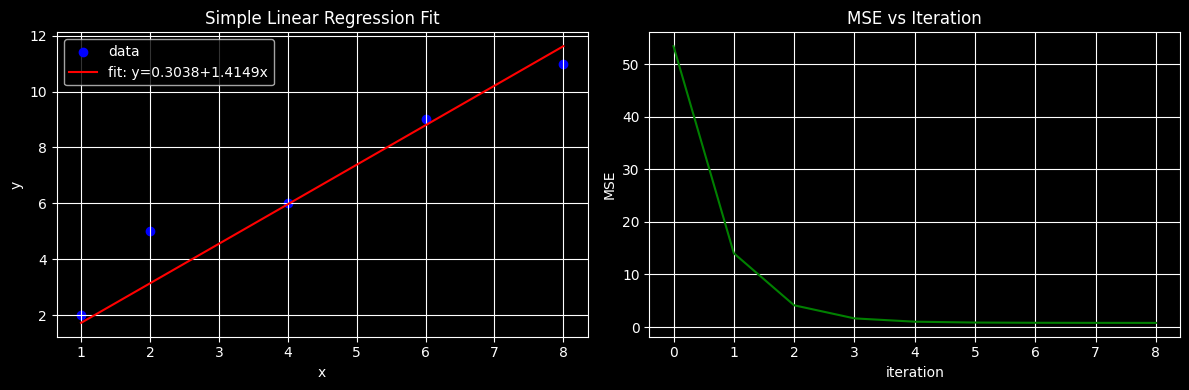

In [6]:
# 3. Visualization
plt.figure(figsize=(12, 4))

# Subplot 1: data + fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, label="data", color="blue")
plt.plot(x, [a + b * xi for xi in x], label=f"fit: y={a:.4f}+{b:.4f}x", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression Fit")
plt.legend()
plt.grid(True)

# Subplot 2: MSE over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(mse_history)), mse_history, color="green")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.title("MSE vs Iteration")
plt.grid(True)

plt.tight_layout()
plt.show()
